In [1]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
class TD0Agent:
    def __init__(self, env,prediction_steps, alpha=0.1, gamma=0.99):
        self.prediction_steps=prediction_steps
        self.env = env
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.V = np.zeros(env.observation_space.n)  # State-value function
        self.grid_size = int(np.sqrt(env.observation_space.n))  # Assuming square grid

    def policy(self, state):
        """Random policy: chooses actions uniformly."""
        return self.env.action_space.sample()

    def train(self, episodes=1000, visualize_interval=100):
        for episode in range(episodes):
            state = self.env.reset()[0]  # Reset environment
            done = False

            while not done:
                action = self.policy(state)
                next_state, reward, done, _, _ = self.env.step(action)

                # TD(0) update rule
                future_rewards=(reward)
                for i in range(1,self.prediction_steps+1):
                    if(i==self.prediction_steps):
                        future_rewards+=((self.gamma)**self.prediction_steps)*self.V[next_state]
                        continue
                    next_state,reward,done,_,_=self.env.step(action)
                    future_rewards+=(((self.gamma)**i)*reward)

                self.V[state]+=self.alpha*(future_rewards-self.V[state])


                state = next_state  # Move to the next state

            # Visualize every few episodes
            if episode % visualize_interval == 0 or episode == episodes - 1:
                self.visualize_value_function(episode)

    def visualize_value_function(self, episode):
        """Visualizes the learned state-value function as a heatmap."""
        plt.figure(figsize=(6, 5))
        sns.heatmap(self.V.reshape(self.grid_size, self.grid_size), annot=True, cmap="coolwarm", cbar=True)
        plt.title(f"State Value Function at Episode {episode}")
        plt.show()
        time.sleep(0.5)  # Pause to see updates

    def render_env(self):
        """Renders the Frozen Lake Environment."""
        self.env.reset()
        self.env.render()

    def get_value_function(self):
        return self.V

Frozen Lake Environment:


c:\Users\Falcon\Desktop\RL\RL_env\Lib\site-packages\gymnasium\envs\toy_text\frozen_lake.py:334: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym.make("FrozenLake-v1", render_mode="rgb_array")
  gym.logger.warn(


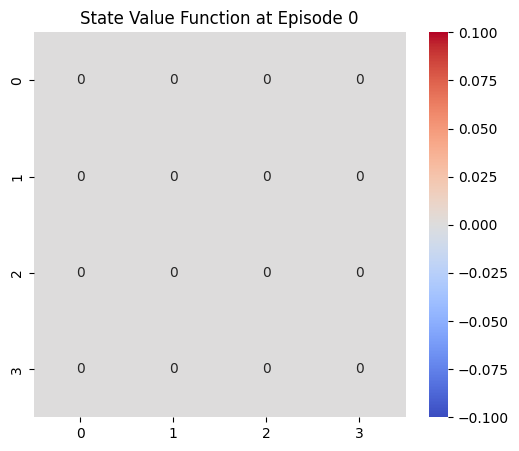

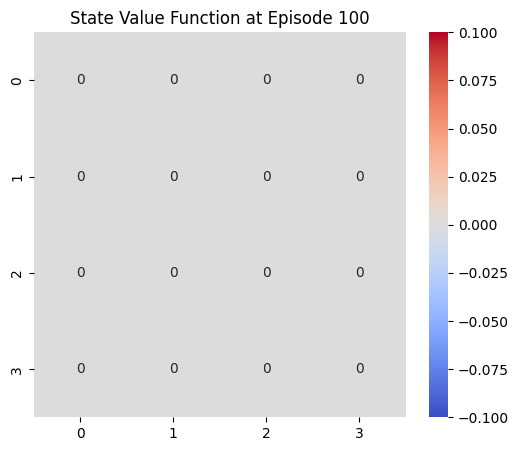

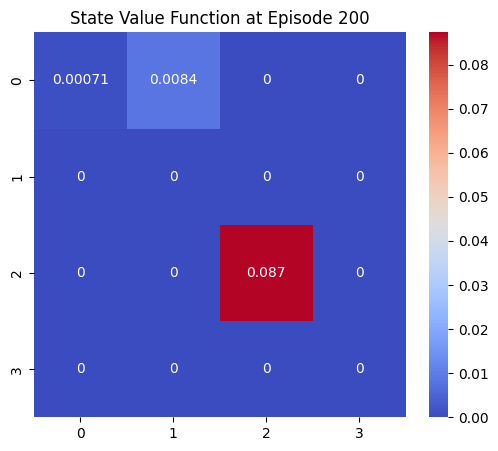

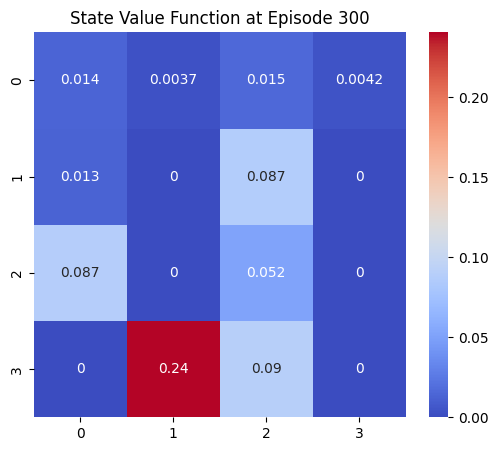

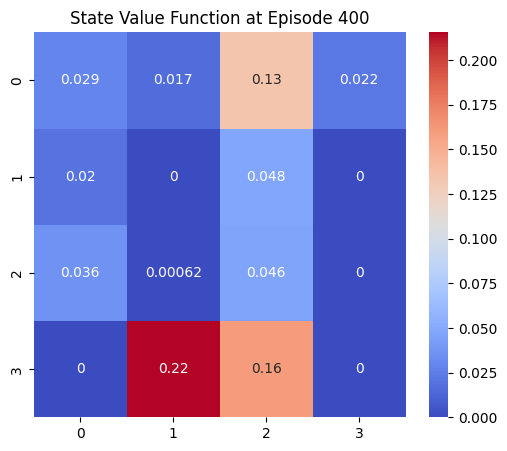

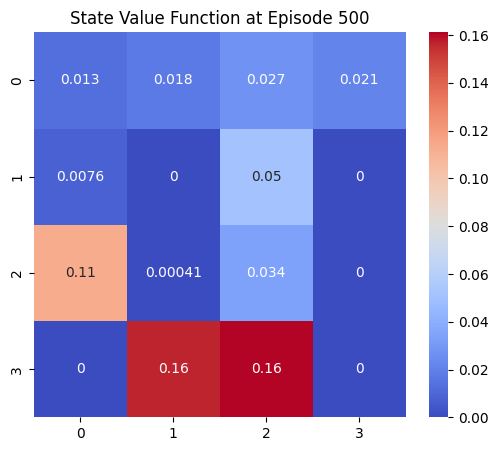

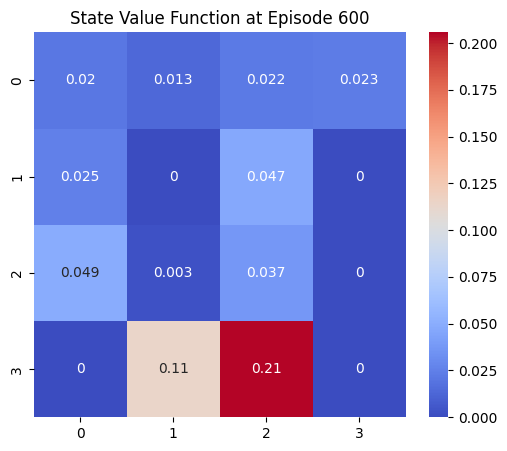

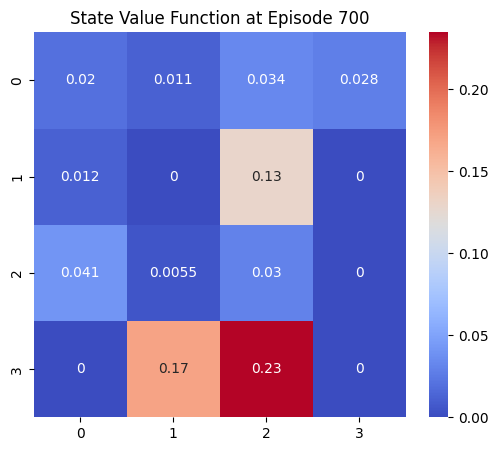

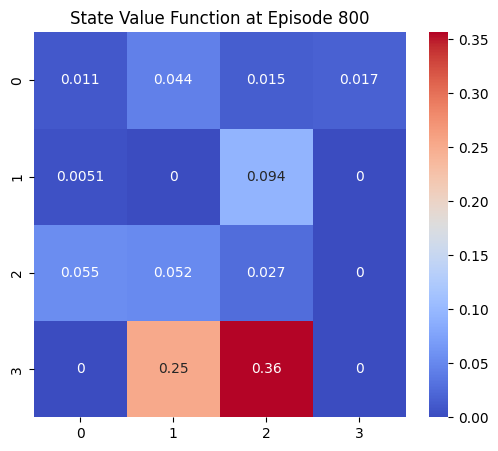

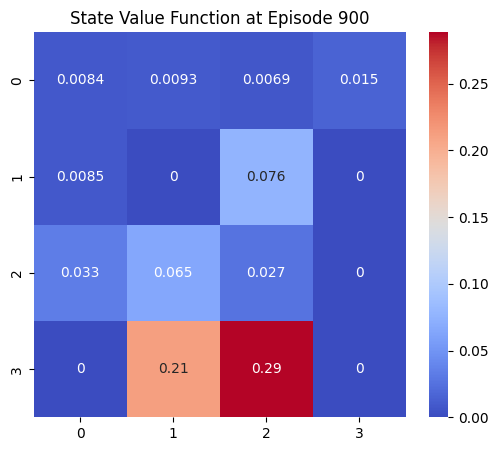

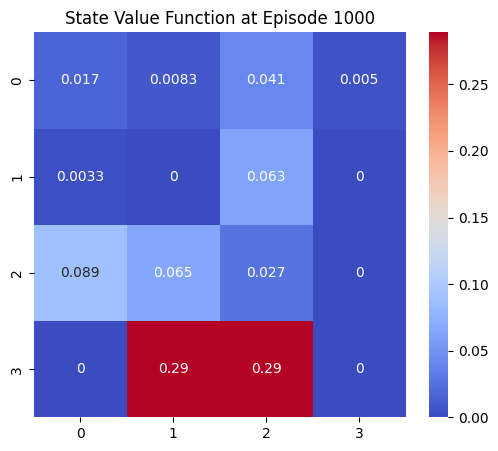

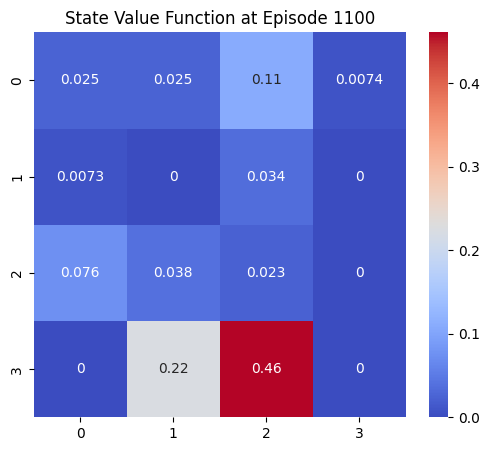

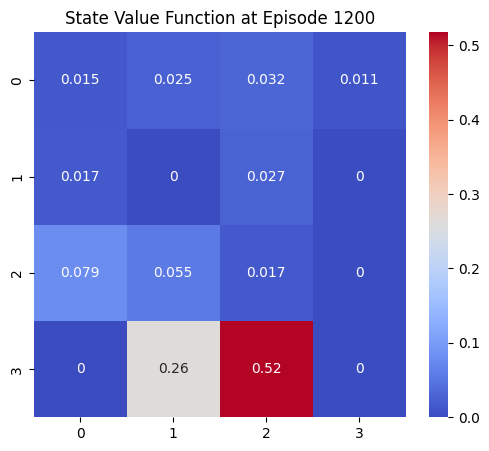

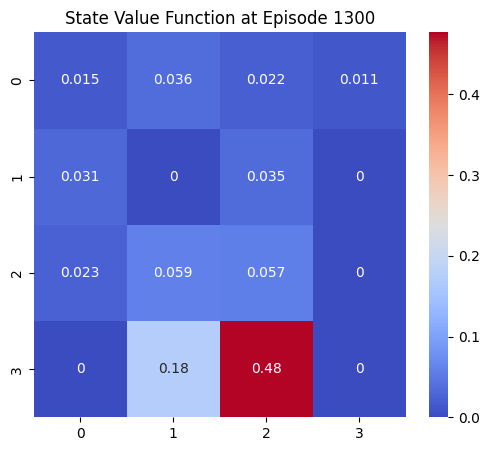

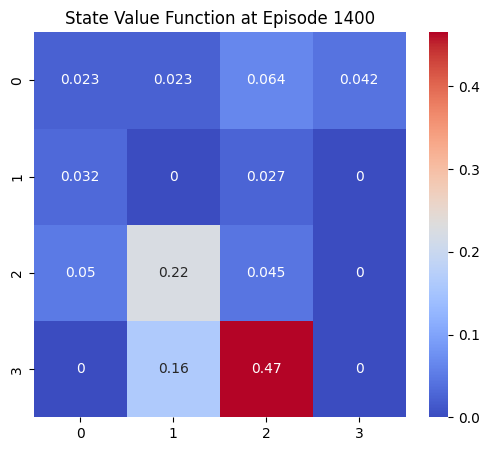

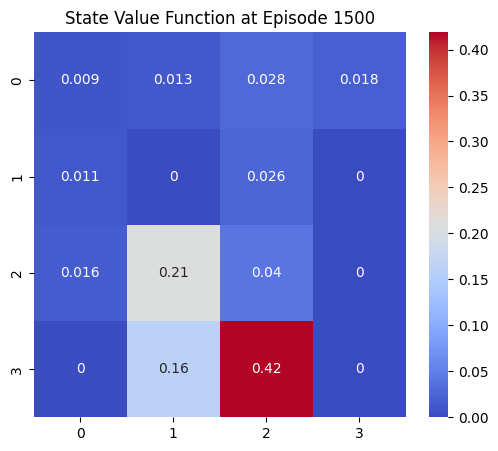

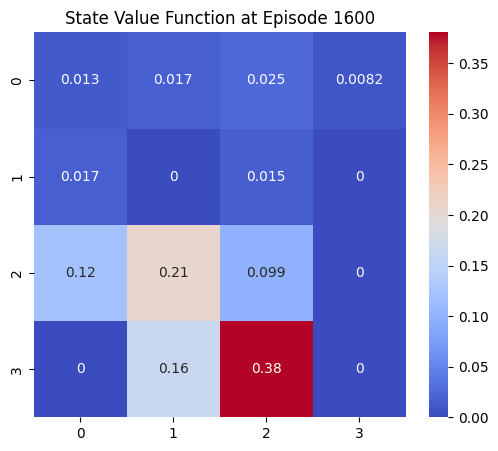

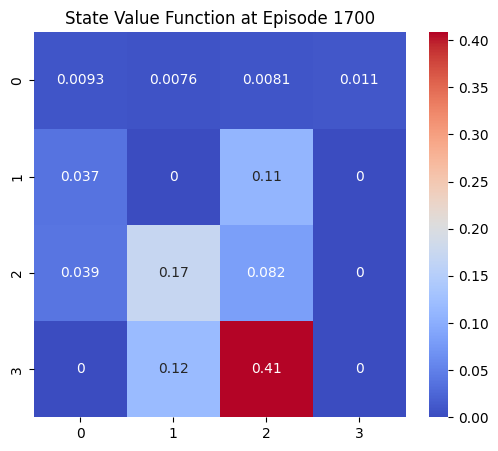

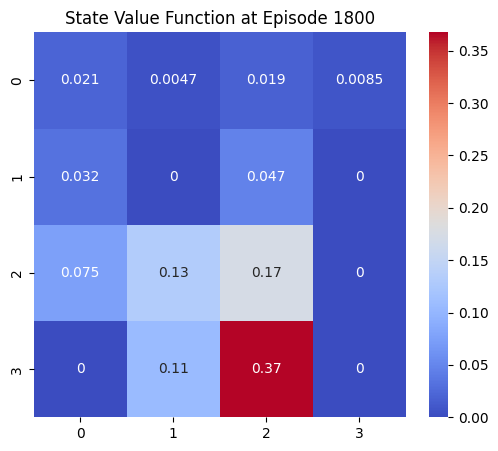

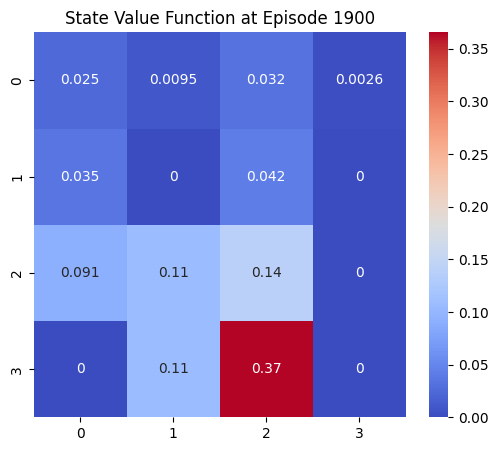

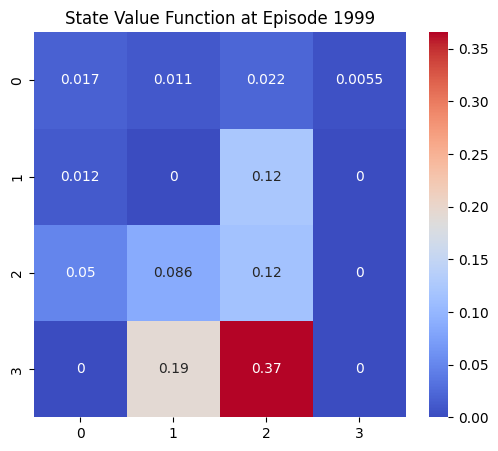

Final Learned Value Function:
[0.01741557 0.01114022 0.02209837 0.00552531 0.01169451 0.
 0.12148154 0.         0.04989346 0.08646765 0.11563135 0.
 0.         0.19262586 0.36575669 0.        ]


In [3]:
# Example Usage
env = gym.make("FrozenLake-v1")
# env = gym.make("FrozenLake-v1", render_mode = 'human')  # A simple gridworld environment
agent = TD0Agent(prediction_steps=5,env=env)

# Render the initial FrozenLake grid
print("Frozen Lake Environment:")
agent.render_env()

# Train the agent and visualize updates
agent.train(episodes=2000, visualize_interval=100)

# # Print final learned state values
print("Final Learned Value Function:")
print(agent.get_value_function())

### Cliff Walker

In [4]:
import numpy as np
from gymnasium import Env,spaces
from time import sleep

class CliffBoy(Env):
    def __init__(self,gridsize,cliff_size=1):
        super(CliffBoy,self).__init__()
        self.gridsize=gridsize

        self.action_space=spaces.Discrete(4)
        self.observation_space=spaces.Discrete(gridsize*gridsize)

        self.ground=np.zeros((gridsize,gridsize),dtype=object)
        
        self.state=(0,0)

        self.cum_reward=0

        cliff_seed=self.random_position()
        cliff_direction=np.random.randint(0,2)
        for i in range(cliff_size):
            self.ground[
                (cliff_seed[0]+(i*(np.abs(cliff_direction-1))))%gridsize,
                (cliff_seed[1]+(i*cliff_direction))%gridsize
            ]='C'

        self.goal=(gridsize-1,gridsize-1)
        self.ground[self.goal[0],self.goal[1]]='G'


    def step(self,action):
        x,y=self.state

        if action == 0:  # Left
            y = max(0, y - 1)
        elif action == 1:  # Down
            x = min(self.gridsize - 1, x + 1)
        elif action == 2:  # Right
            y = min(self.gridsize - 1, y + 1)
        elif action == 3:  # Up
            x = max(0, x - 1)

        self.state = (x, y)

        reward = self.get_reward()
        self.cum_reward+=reward

        done = self.ground[x, y] == 'C' or self.ground[x, y] == 'G'

        return self._get_state_index(), reward, done, {},{}

    def get_reward(self):
        if(self.state==(self.gridsize-1,self.gridsize-1)):
            return 100
        elif(self.ground[self.state[0],self.state[1]]=='C'):
            return -100
        else:
            return -1

    def reset(self):
        self.state = (0, 0)
        return [self._get_state_index()]

    def _get_state_index(self):
        return self.state[0] * self.gridsize + self.state[1]

    def random_position(self):
        return [np.random.randint(1,self.gridsize),np.random.randint(1,self.gridsize)]

    def render(self,showStep=False):
        if(showStep):
            sleep(0.05)
            print(end='\033[2J')
            print(end='\033[H')

        for i in range(self.gridsize):
            for j in range(self.gridsize):
                if(self.state==(i,j)):
                    print('A',end=' ')
                elif(self.ground[i][j]==0):
                    print('.',end=' ')
                else:
                    print(self.ground[i][j],end=' ')
            print()      

A . . . . . . . . . . . 
. . . . . . . . . . . . 
. . . C C C C C C C C . 
. . . . . . . . . . . . 
. . . . . . . . . . . . 
. . . . . . . . . . . . 
. . . . . . . . . . . . 
. . . . . . . . . . . . 
. . . . . . . . . . . . 
. . . . . . . . . . . . 
. . . . . . . . . . . . 
. . . . . . . . . . . G 


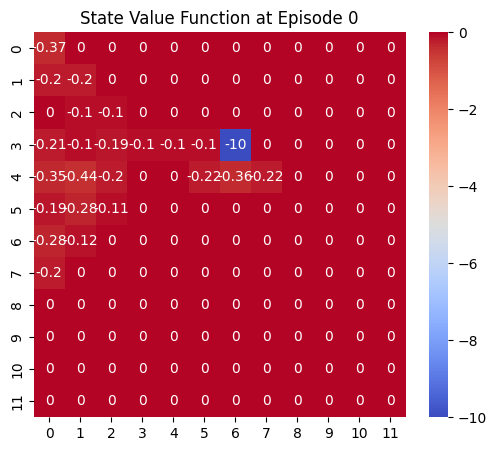

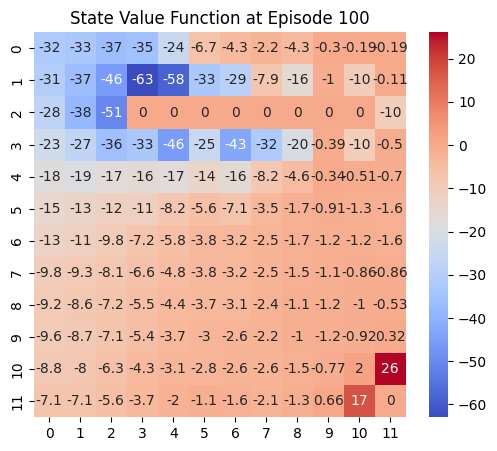

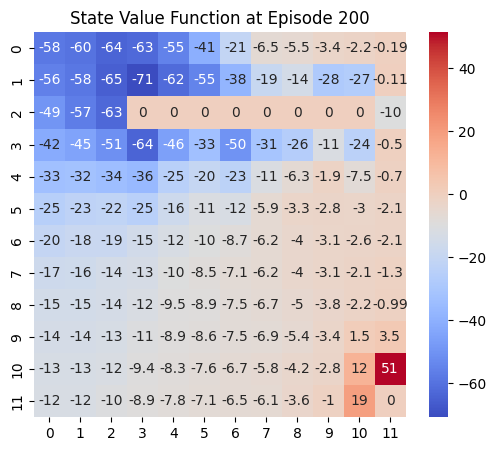

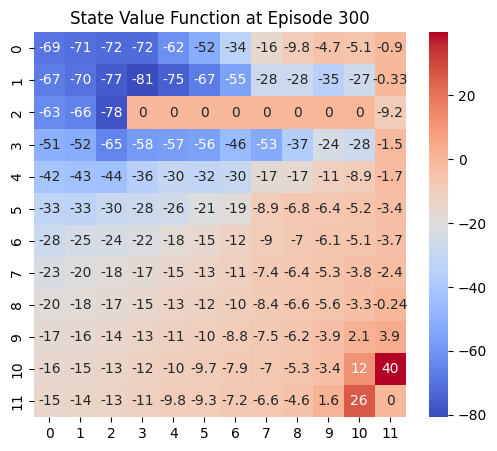

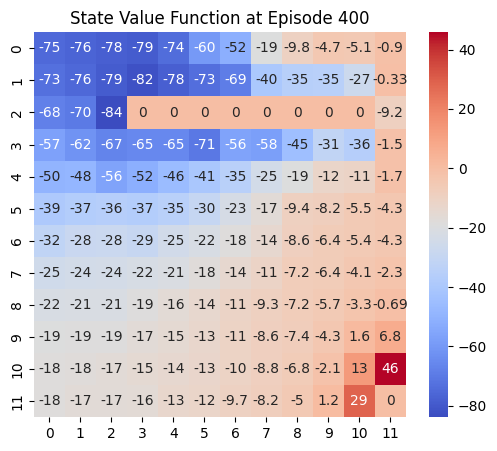

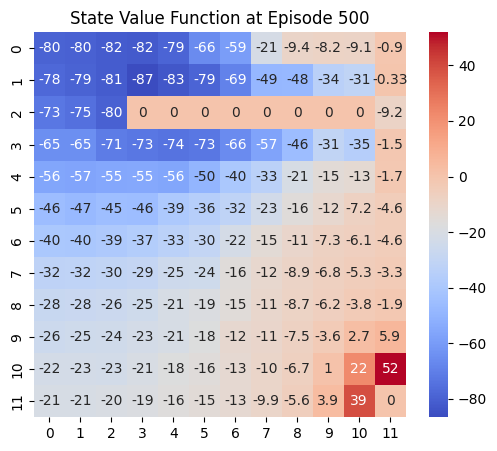

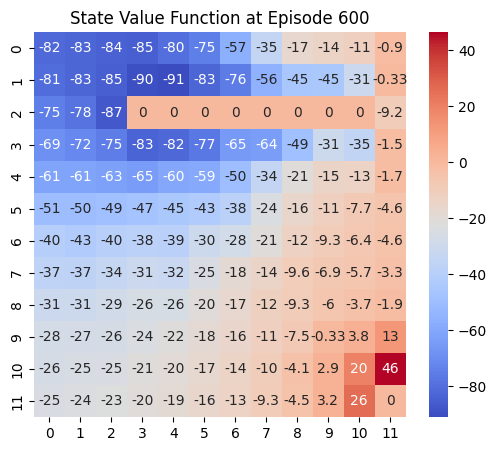

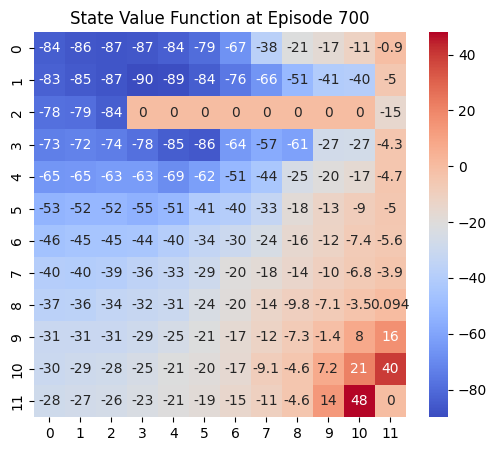

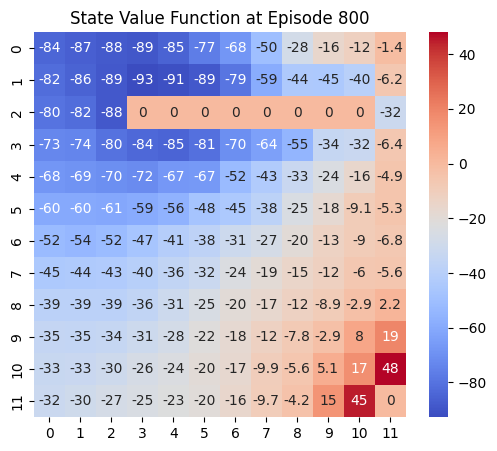

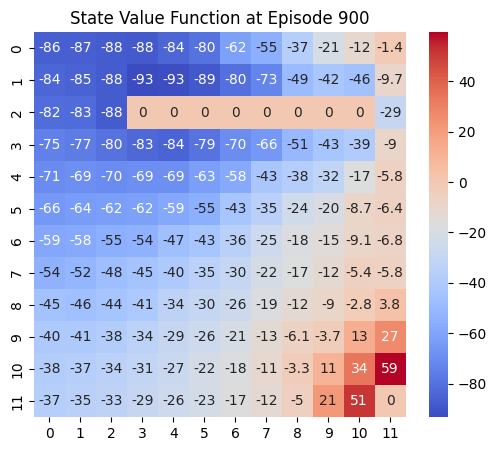

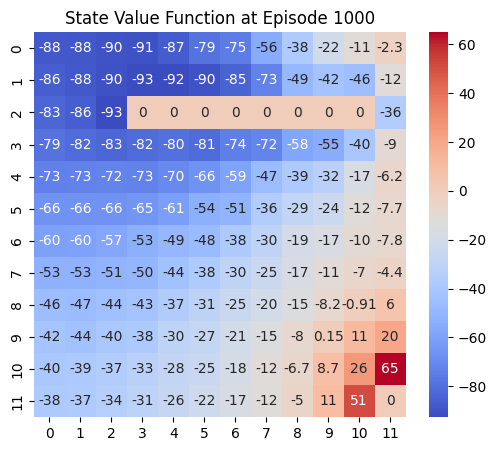

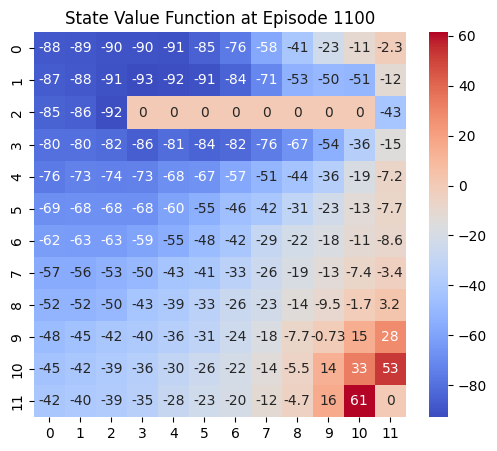

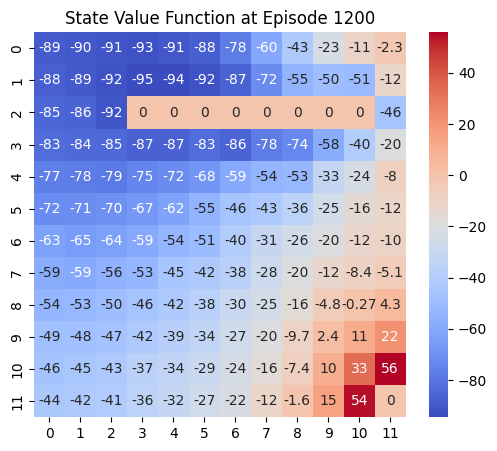

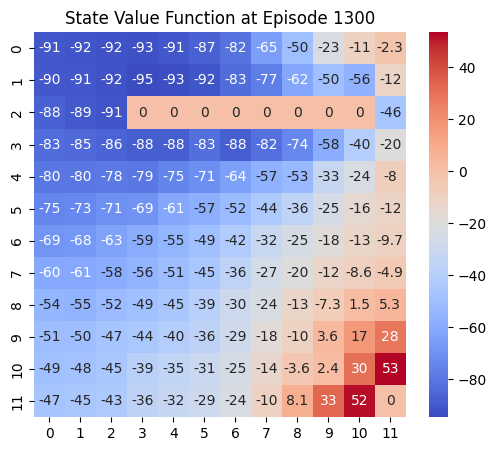

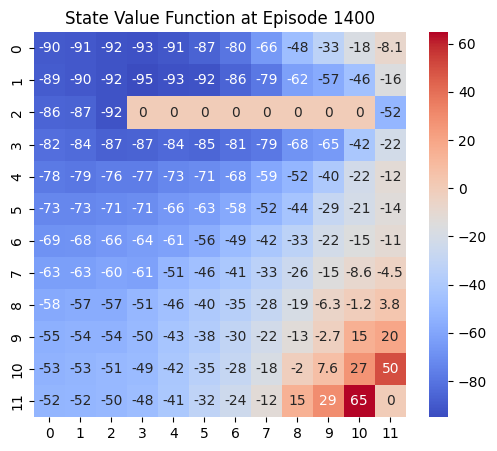

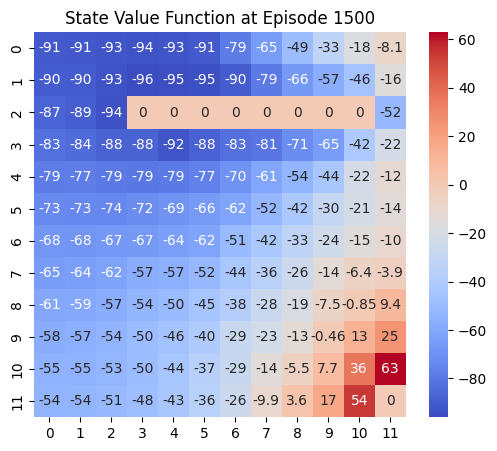

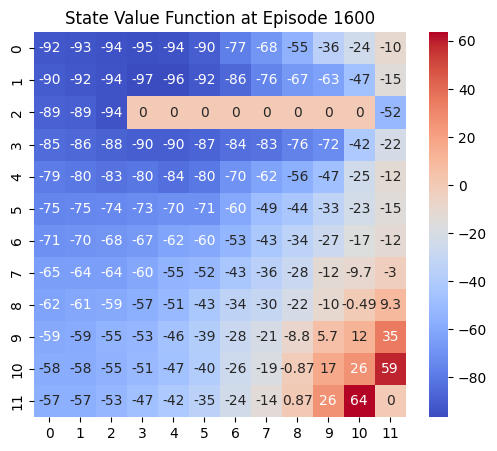

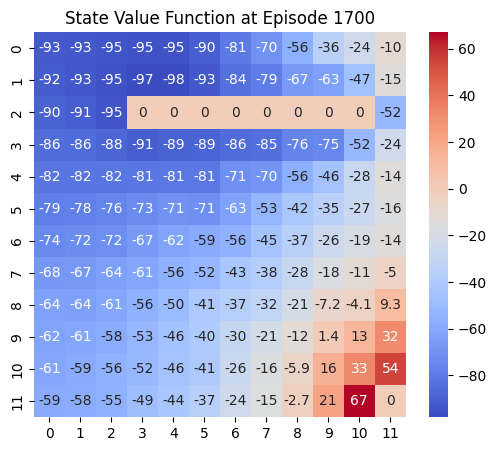

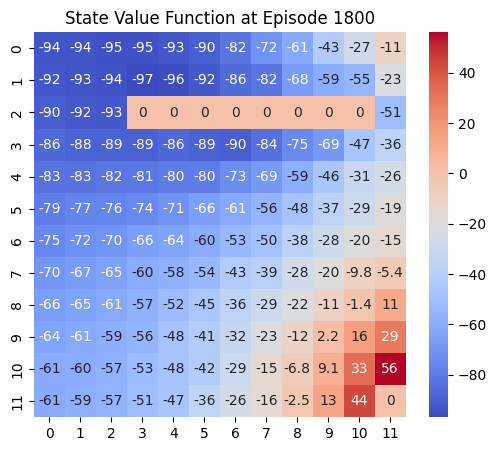

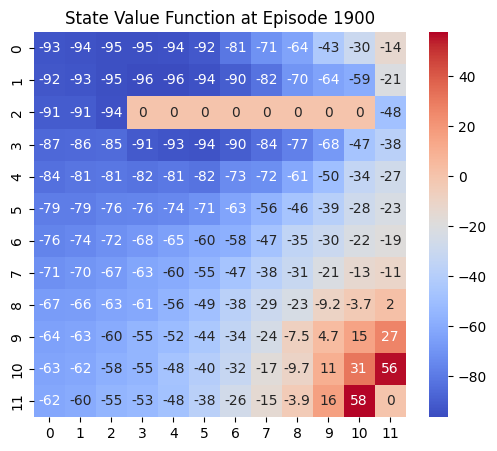

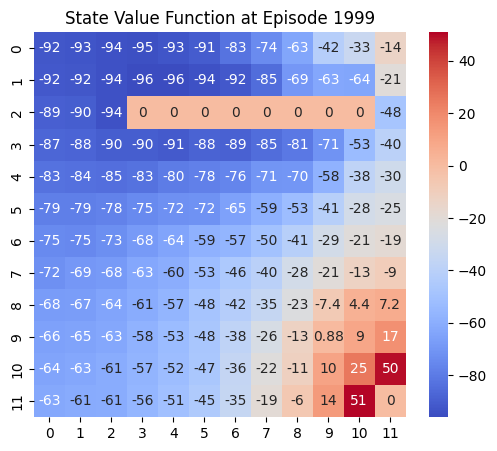

In [5]:
env=CliffBoy(12,cliff_size=8)
agent=TD0Agent(env,prediction_steps=1)
agent.render_env()
agent.train(episodes=2000,visualize_interval=100)